<h1>Logistics Regression (Classification) </h1>
<p>
Trying to sparate the classes by line or Curve using Gradient Descent Algorithm

Read More at

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


<h3> Gradient Descent Algorithm (Logistics)</h3>
<p>
We start with assumpution equation (Called hypothesis) which can separte above data in two classes. 
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width=200 align="right" />
<p>
 
 $h(x) =w_0 + w_1 x_1+ w_2 x_2 $

 


 Let's define $g(z) =\displaystyle\frac{1}{1+e^{-z}}$
 
 where $g$ is called "sigmoid" or "logistics" function
</p>
The coefficients with initial guess (i.e. $w_0$, $w_1$...) of $h(x)$ will be fed into the algorithm.
Then Program will start from initial guess and then iterate steps to find the best fit.
<p> We predict $\hat{Y}= 1$ if
    g($h(x))>=0.5$ i.e.  $h(x)>=0$ 
<p> We predict $\hat{Y}= 0$  if
    g($h(x))<0.5$ i.e. $h(x)<0$
<p>
 Our objective is to minimize Error in predicted values.
    <p>
 $ Error=   \hat{Y}-Y$  Where  $\hat{Y}=g(h(X))$
 </p>
Since Loss involve propablities between 0 and 1. we define loss function differently. we define Loss/Cost function as follows

<h3>Cost/Loss Function</h3>
Loss funnction is defined as
<p>$L(W) = \dfrac {-1}{n} \displaystyle \sum _{i=1}^n \left [ Y_{i} log(\hat{Y}_{i})+ (1-Y_{i}) log(1-\hat{Y}_{i}) \right]$
<p> and gradient update is same as it was in case of linear. 

$ W :=  W - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(\hat{Y} - Y)X $ 
    


<h1> Derivation of Logistics Loss Function and Gradient Updates

<h3>Cost/Loss Function(logistics)</h3>
<p>
<p>$h(x) =W^T X$  where $W^T X=w_0 + w_1 x+ w_2 y $
<p>$g(z) =\displaystyle\frac{1}{1+e^{-z}}$
<p>$\implies \hat{Y}=g(h(X))=g(W^T X)=\displaystyle\frac{1}{1+e^{-W^T X}}$


 <p>We calculate loss, 
      
   <p>$Loss= \begin{cases} 
              -\log(\hat{Y}) & Y=1 \\
              -\log(1- \hat{Y}) & Y=0
               \end{cases}$
 <p> Therefore we can simplify above discrete funciton into following loss function     
 <p>$L(W)=\frac{-1}{n} \displaystyle \sum_{i=1}^n[Ylog(\hat{Y}) +(1-Y)log(1-\hat{Y})]$

<h3>Derivative of Cost/Loss Function(logistics)</h3>
  <p>Now, 
      
   <p>$\log(\hat{Y})=\displaystyle\log(\frac{1}{1+e^{-W^T X} })$  
    <p> $\hspace{20mm}  =  -\log ( 1+e^{-W^T X} ) $
    
 <p> $\log(1- \hat{Y})=\displaystyle\log(1-\frac{1}{1+e^{-W^T X}})$
  <p>  $\hspace{25mm}=\displaystyle\log(\frac{e^{-W^T X}}{1+e^{-W^T X}})$
  <p>  $\hspace{25mm}=\log (e^{-W^T X} )-\log ( 1+e^{-W^T X} )$
  <p>  $\hspace{25mm}=e^{-W^T X}-\log ( 1+e^{-W^T X} )$
    <p>$L(W)=\frac{-1}{n} \displaystyle \sum_{i=1}^n[Ylog(\hat{Y}) +(1-Y)log(1-\hat{Y})]$
    <p> $\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[-Y(\log ( 1+e^{-W^T X})) + (1-Y)(-W^T X-\log ( 1+e^{-W^T X} ))\right]$    
 <p>$\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[YW^T X-W^T X-\log(1+e^{-W^T X})\right]$    
 <p>$\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[YW^T X-\log e^{W^T X}- \log(1+e^{-W^T X})\right]$  
      $\hspace{15mm}\text{using}\hspace{15mm} \log(e^{W^T X})  = W^T X $
 <p>$\hspace{15mm}=\frac{-1}{n}\displaystyle\sum_{i=1}^n \left[YW^T X-\log(1+e^{W^T X})\right]$ 
    $\hspace{15mm}\text{using}\hspace{15mm} \log(X) + \log(Y) = log(X Y) $  


<p>$\frac{\partial}{\partial W} L(W)$
    $=\frac{\partial}{\partial W}(-YW^T X +\displaystyle\log(1+e^{W^T X}))$
   <p> $\hspace{20mm}=\frac{\partial}{\partial W}(-YW^T X) +\frac{\partial}{\partial W}(\log(1+e^{W^T X})))$
   <p> $\hspace{20mm}=-YX+\displaystyle\frac{e^{W^T X}}{1+e^{W^T X}} X$
    <p> $\hspace{20mm}=(-Y+\displaystyle\frac{e^{W^T X}}{1+e^{W^T X }}) X$
    <p> $\hspace{20mm}=(-Y+\displaystyle\frac{1}{1+e^{-W^T X }}) X$
    <p> $\hspace{20mm}=(-Y+\hat{Y}) X$
   <p>$ Finally$
    <p> $\implies\frac{\partial}{\partial W} L(W)=(\hat{Y}-Y) X$
    

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools

<H1>Data Generate

In [3]:
X1=[]
X2=[]
Y1=[]

for i,j in itertools.product(range(50),range(50)):
    if abs(i-j)>5 and abs(i-j)<40 and np.random.randint(5,size=1) >0:
        X1=X1+[i/2]
        X2=X2+[j/2]
        if (i>j):
            Y1=Y1+[1]
        else:
            Y1=Y1+[0]
            
X=np.array([X1,X2]).T
Y=np.array([Y1]).T

<h5> Visualize Data

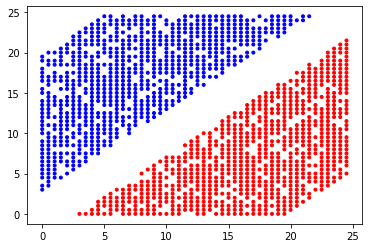

In [4]:
cmap = ListedColormap(['blue', 'red'])                    
plt.scatter(X1,X2, c=Y1,marker='.', cmap=cmap)
plt.show()

<h5>Normalize Input   

In [5]:
SMean=np.min(X,axis=0)    #using Min-Max Normalization
SDev=np.max(X,axis=0)
def NormalizeInput(X,SMean,SDev):   
    XNorm=(X-SMean)/SDev
    return XNorm

In [6]:
XNorm=NormalizeInput(X,SMean,SDev)

<h5>Add Polynomial Features

In [7]:
def mapFeature(X,degree):
    
    sz=X.shape[1]
    if (sz==2):
        sz=(degree+1)*(degree+2)/2
        sz=int(sz)
    else:
         sz=degree+1
    out=np.ones((X.shape[0],sz))     #Adding Bias W0

    sz=X.shape[1]
    if (sz==2):
        X1=X[:, 0:1]
        X2=X[:, 1:2]
        col=1
        for i in range(1,degree+1):        
            for j in range(0,i+1):
                out[:,col:col+1]= np.multiply(np.power(X1,i-j),np.power(X2,j))    
                col+=1
        return out
    else:
        for i in range(1,degree+1):        
            out[:,i:i+1]= np.power(X,i)
    
    return out

In [8]:
degree=2
inputX=mapFeature(XNorm,degree) 

<h1>Training

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def computeCost(weights,X,Y):
    n = X.shape[0]
    hx=np.matmul( X,weights)                      #Hypothesis
    Y_hat=sigmoid(hx)
    term1=np.sum(np.multiply(Y,np.log(Y_hat)))
    term2=np.sum(np.multiply(np.subtract(1,Y),np.log(1-Y_hat)))    
    J=(-1/n)*(term1+term2)
    return J

<h5> Initialization

In [12]:
batchSize=len(Y)         #no of Examples
iterations = 10000
alpha = 0.9
learningDecayRate=0.999998
featureCount=inputX.shape[1] 
weights=np.zeros((featureCount, 1)) #initialize Weight Paramters
dW=np.zeros((featureCount, 1))
lossList=np.zeros((iterations,1),dtype=float)  #for plotting loss curve

<h5> Gradient Descent Updates

In [13]:

for k in range(iterations):
    #nth iteration
    t=k+1
    
    #Hypothesis
    hx=np.matmul( inputX,weights)           
    
    Y_hat=sigmoid(hx)
    
    #Loss
    loss=Y_hat-Y  
    
    
    #derivative
    dW=np.matmul(inputX.T,loss)  #Derivative
   
    
    
    #gradient Update
    weights=weights - (alpha/batchSize)*dW                           #Simple
    
    #Compute Loss for Plotting
    lossList[k]=computeCost(weights,inputX,Y)

print("{0:.15f}".format(lossList[iterations-1][0]))


0.005443663249443


<h1>Plot Loss

<function matplotlib.pyplot.show(*args, **kw)>

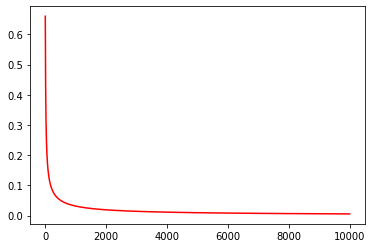

In [14]:
plt.plot(lossList,color='r')
plt.show

<h1> Prediction/Accuracy Evaluation

In [15]:
def predict(X,weights,SMean,SDev,degree):
    XNorm=NormalizeInput(X,SMean,SDev)
    inputX=mapFeature(XNorm,degree)
    fx=np.matmul(inputX, weights)
    hx=sigmoid(fx)
    PY=np.round(hx) 
    return PY


In [16]:
def accurracy(Y1,Y2):
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h5>Accurracy on Training Data

In [17]:
pY=predict(X, weights,SMean,SDev,degree) 
print(accurracy(Y, pY))

100.0


<h1>Plotting Hypothesis

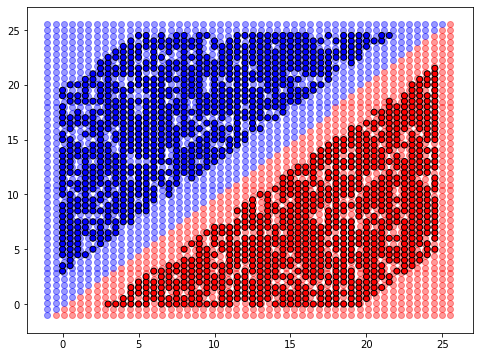

In [28]:
from matplotlib.colors import ListedColormap
myColorMap = ListedColormap(['blue', 'red'])                    


plt.figure(figsize=(8,6))
# Set min and max values and give it some padding
x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1

xx1 =np.linspace(x1_min, x1_max, 50)
xx2 =np.linspace(x2_min, x2_max, 50)
#Plot Prediction Data
for i in range(len(xx1)):
    for j in range(len(xx2)):
        newX=(np.column_stack((xx1[i],xx2[j])))
        newY=predict(newX, weights,SMean,SDev,degree) 
        yColor=myColorMap(int(newY))
        plt.scatter(xx1[i].flatten(),xx2[j].flatten(),color=yColor,alpha=0.4);

#Plot Training data
plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=Y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()

In [30]:
##### Alernative use below Fast Method

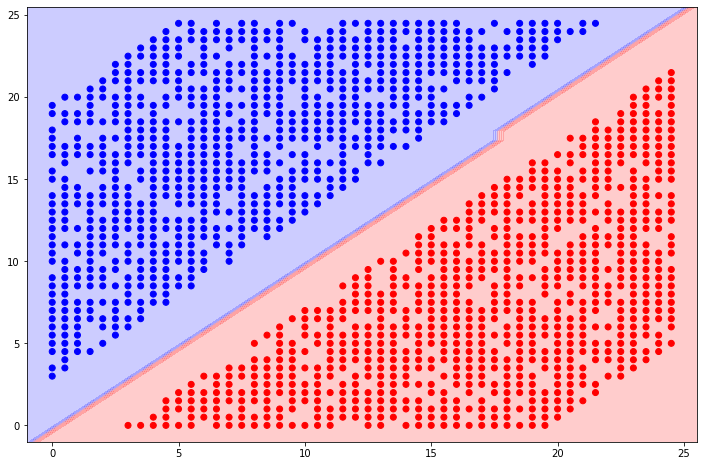

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=Y[:,0], cmap=cmap) 
###########################################################################
#Predict for each X1 and X2 in Grid 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
u = np.linspace(x_min, x_max, 50) 
v = np.linspace(y_min, y_max, 50) 

U,V=np.meshgrid(u,v)
UV=np.column_stack((U.flatten(),V.flatten())) 
W=predict(UV, weights,SMean,SDev,degree) 

###########################################################################
#Exact Decision Boundry can be plot with contour
z = np.zeros(( len(u), len(v) )) 
for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))               
        z[i,j] =predict(uv, weights,SMean,SDev,degree) 
z = np.transpose(z) 
plt.contourf(u, v, z, alpha=0.2,cmap=myColorMap)
###########################################################################
plt.show()

<h3> Visualize Sigmoid for given Data points

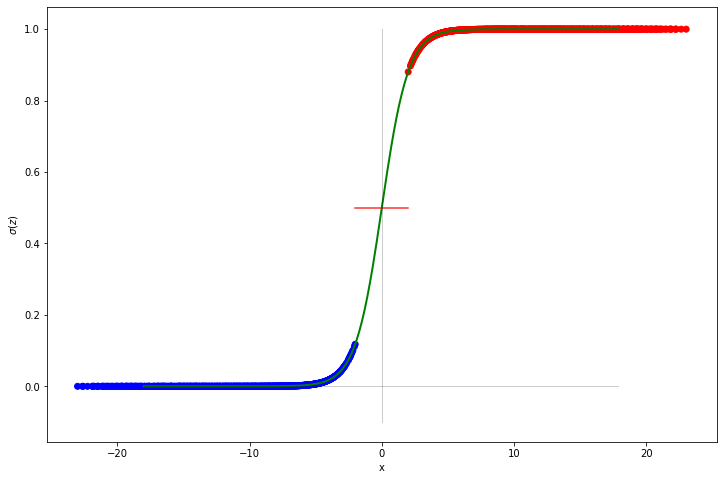

In [19]:
XNorm=NormalizeInput(X,SMean,SDev)
inputX=mapFeature(XNorm,degree)
fx=np.matmul(inputX, weights)
hx=sigmoid(fx)
plt.figure(figsize=(12,8))
plt.scatter(fx,hx,c=np.round(hx), cmap=cmap)

x = np.arange(-18, 18, 0.1)
g = sigmoid(x)
plt.plot(x, g,color='g' ,linewidth=2,alpha=1)
plt.plot(x, x*0,color='k',linewidth=1,alpha=0.2)
plt.plot([-2,0,2], [0.5,0.5,0.5],color='r',alpha=0.8)
plt.plot([0,0], [-0.1,1],color='k',linewidth=1,alpha=0.2)
plt.xlabel('x')
plt.ylabel('$\sigma(z)$')
plt.show()